In [17]:
# import libraries and modules

import torch

from setup import *

# from axis_angle import *
from quaternion import *

from quaternion_analysis import *
from pytorch3d.transforms import matrix_to_quaternion


In [18]:
# Set the cuda device 

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


# 1. TEAPOT

## Teapot (convergence)

In [3]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


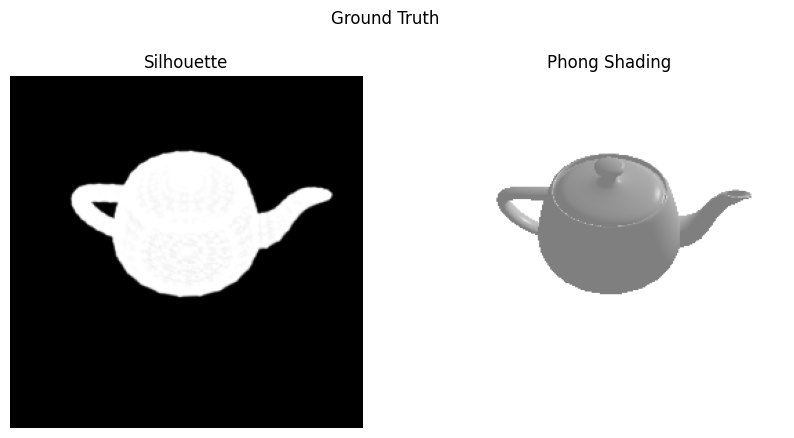

In [4]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 50,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

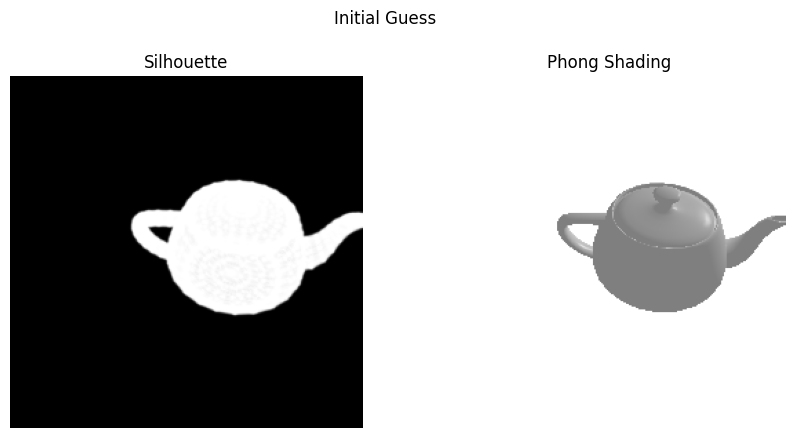

In [5]:
variances = {
    "dist": 1,
    "elev": 30,
    "azim": 30
}

# # # Initial guess for R and T
# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)

# # save R and T to a file
# np.save("data/teapot_R_init_1.npy", R_init.cpu().numpy())
# np.save("data/teapot_T_init_1.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/teapot_R_init_1.npy")).to(device)
T_init = torch.tensor(np.load("data/teapot_T_init_1.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)


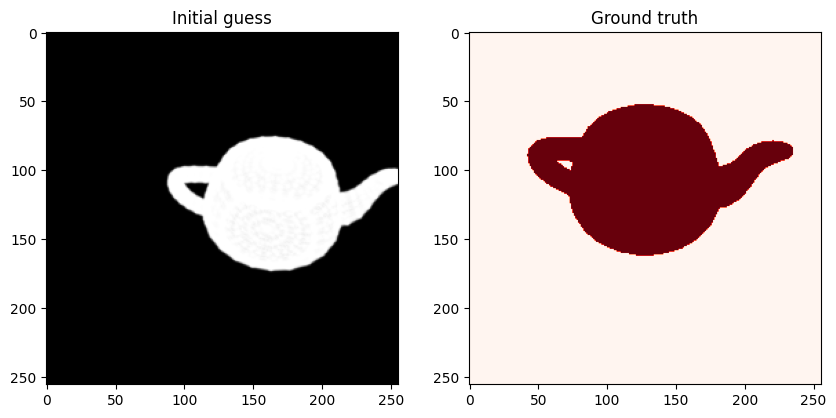

  0%|          | 0/30 [00:10<?, ?it/s]

iteration: 0, loss: 9240.5810546875


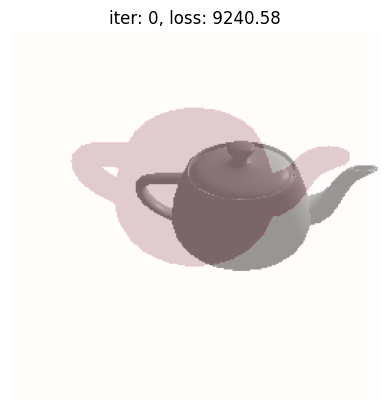

  7%|▋         | 2/30 [00:20<04:45, 10.21s/it]

iteration: 1, loss: 8282.23046875


 10%|█         | 3/30 [00:30<04:28,  9.95s/it]

iteration: 2, loss: 6970.42041015625


 13%|█▎        | 4/30 [00:39<04:12,  9.70s/it]

iteration: 3, loss: 5759.9638671875


 17%|█▋        | 5/30 [00:48<03:55,  9.42s/it]

iteration: 4, loss: 5301.26953125


 17%|█▋        | 5/30 [00:57<03:55,  9.42s/it]

iteration: 5, loss: 5495.0751953125


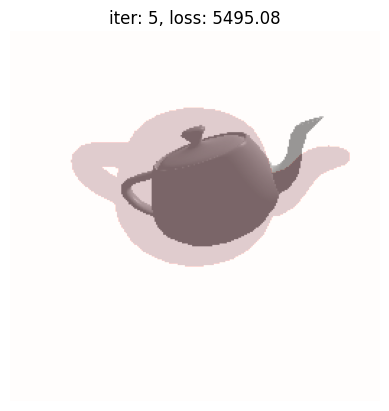

 23%|██▎       | 7/30 [01:06<03:32,  9.25s/it]

iteration: 6, loss: 5641.74853515625


 27%|██▋       | 8/30 [01:15<03:21,  9.16s/it]

iteration: 7, loss: 5612.27880859375


 30%|███       | 9/30 [01:24<03:10,  9.08s/it]

iteration: 8, loss: 5531.52294921875


 33%|███▎      | 10/30 [01:33<03:01,  9.07s/it]

iteration: 9, loss: 5356.564453125


 33%|███▎      | 10/30 [01:42<03:01,  9.07s/it]

iteration: 10, loss: 5119.5234375


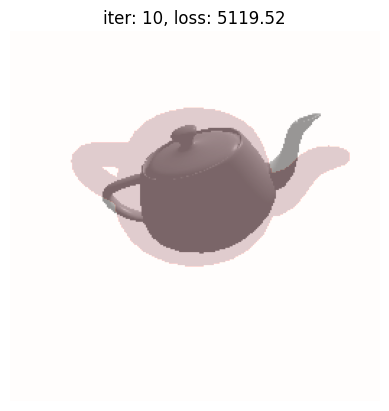

 40%|████      | 12/30 [01:52<02:47,  9.31s/it]

iteration: 11, loss: 4841.14208984375


 43%|████▎     | 13/30 [02:02<02:40,  9.47s/it]

iteration: 12, loss: 4506.80078125


 47%|████▋     | 14/30 [02:12<02:33,  9.59s/it]

iteration: 13, loss: 4142.1806640625


 50%|█████     | 15/30 [02:22<02:26,  9.75s/it]

iteration: 14, loss: 3809.2431640625


 50%|█████     | 15/30 [02:32<02:26,  9.75s/it]

iteration: 15, loss: 3461.216796875


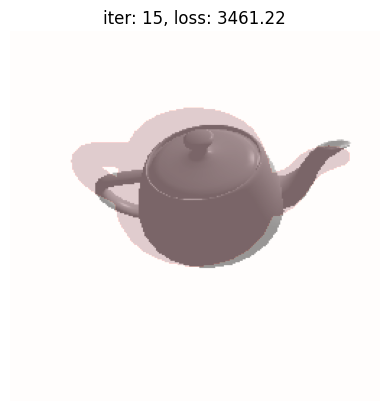

 57%|█████▋    | 17/30 [02:43<02:12, 10.19s/it]

iteration: 16, loss: 3208.48681640625


 60%|██████    | 18/30 [02:54<02:03, 10.28s/it]

iteration: 17, loss: 3072.083984375


 63%|██████▎   | 19/30 [03:04<01:53, 10.34s/it]

iteration: 18, loss: 2744.065185546875


 67%|██████▋   | 20/30 [03:15<01:43, 10.37s/it]

iteration: 19, loss: 2169.8212890625


 67%|██████▋   | 20/30 [03:25<01:43, 10.37s/it]

iteration: 20, loss: 1600.8370361328125


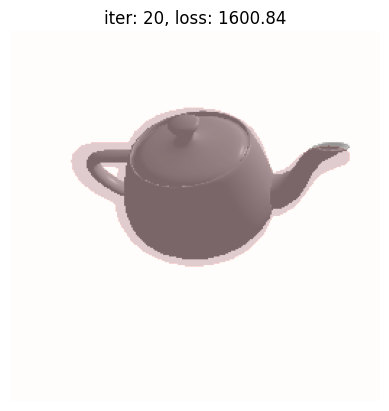

 73%|███████▎  | 22/30 [03:36<01:24, 10.57s/it]

iteration: 21, loss: 1397.3079833984375


 77%|███████▋  | 23/30 [03:47<01:14, 10.64s/it]

iteration: 22, loss: 1122.597900390625


 80%|████████  | 24/30 [03:58<01:04, 10.71s/it]

iteration: 23, loss: 856.9151000976562


 83%|████████▎ | 25/30 [04:09<00:53, 10.78s/it]

iteration: 24, loss: 1223.96240234375


 83%|████████▎ | 25/30 [04:20<00:53, 10.78s/it]

iteration: 25, loss: 1429.9417724609375


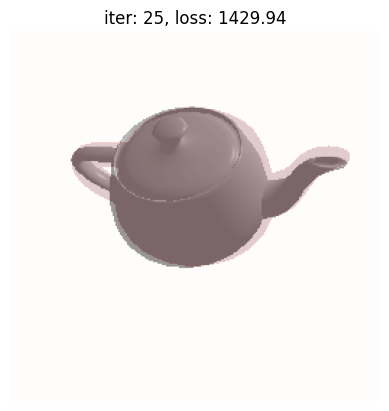

 90%|█████████ | 27/30 [04:31<00:32, 10.96s/it]

iteration: 26, loss: 1329.791015625


 93%|█████████▎| 28/30 [04:43<00:22, 11.13s/it]

iteration: 27, loss: 1194.8233642578125


 97%|█████████▋| 29/30 [04:54<00:11, 11.15s/it]

iteration: 28, loss: 1325.801025390625


100%|██████████| 30/30 [05:05<00:00, 10.19s/it]

iteration: 29, loss: 1046.961669921875


In [6]:
losses, parameter_updates, R_min, T_min = train_quaternion_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 30, device)

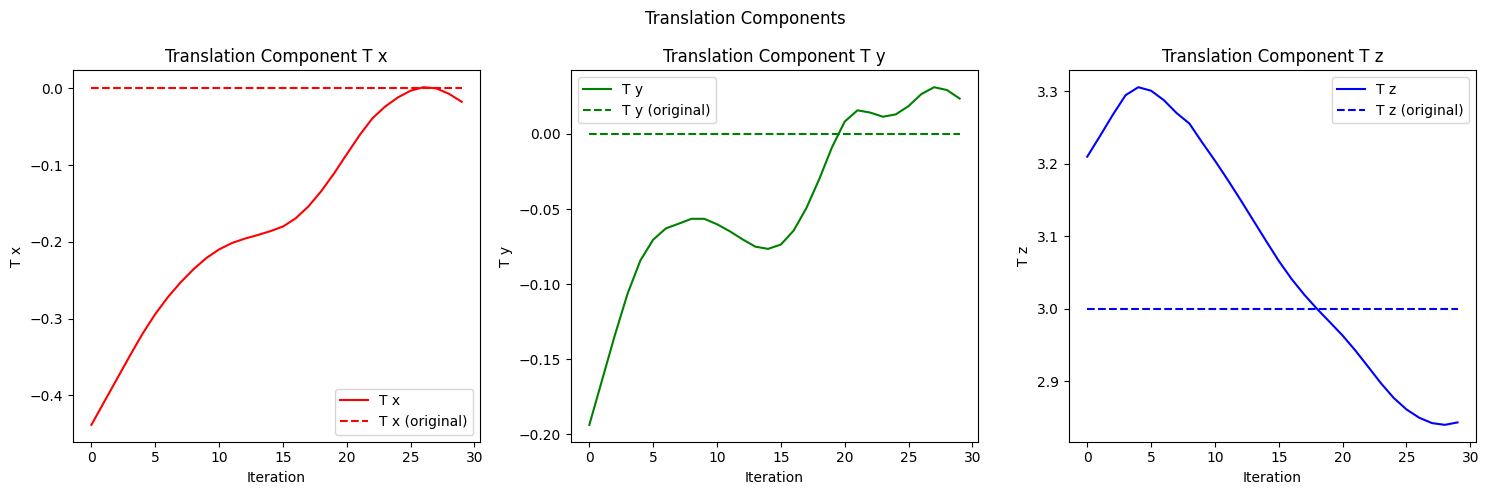

In [7]:
plot_translations(T_gt, parameter_updates)

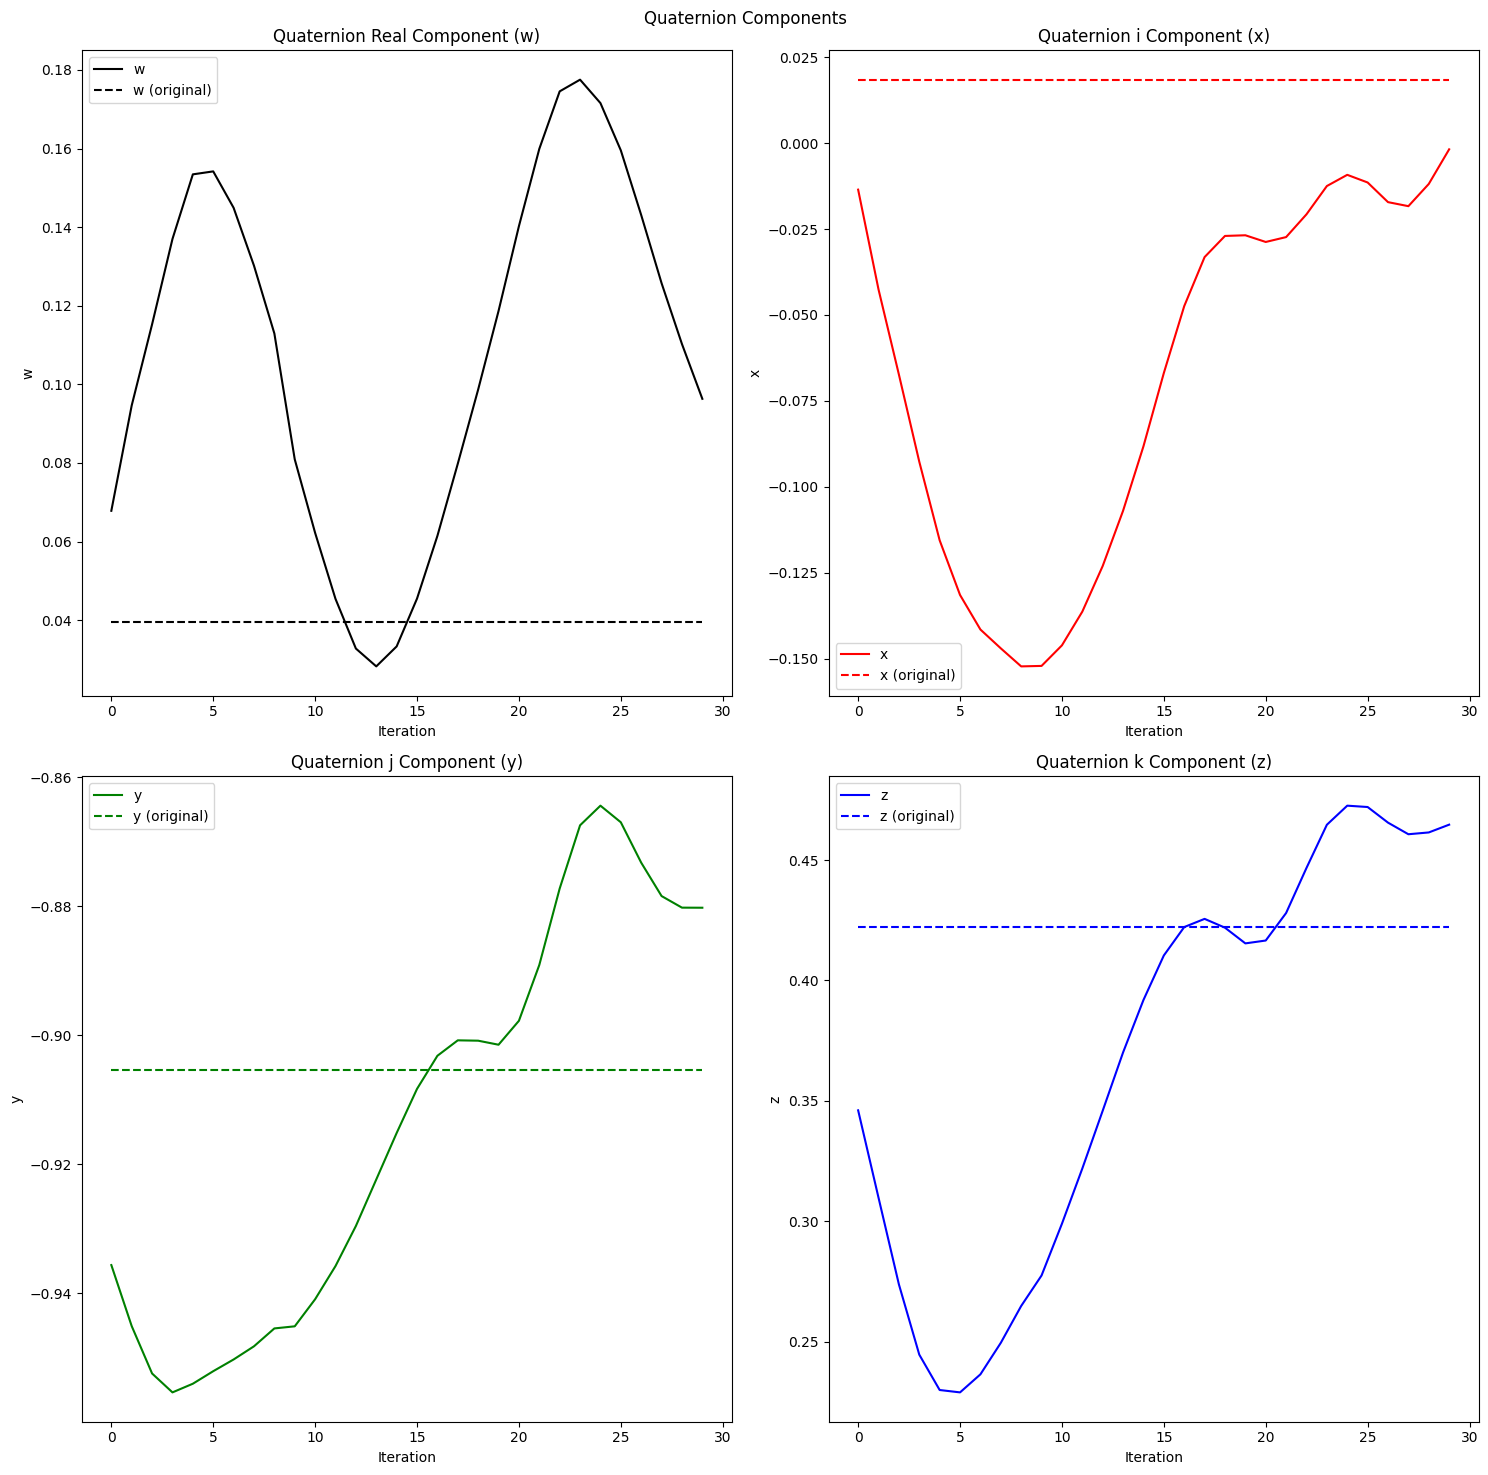

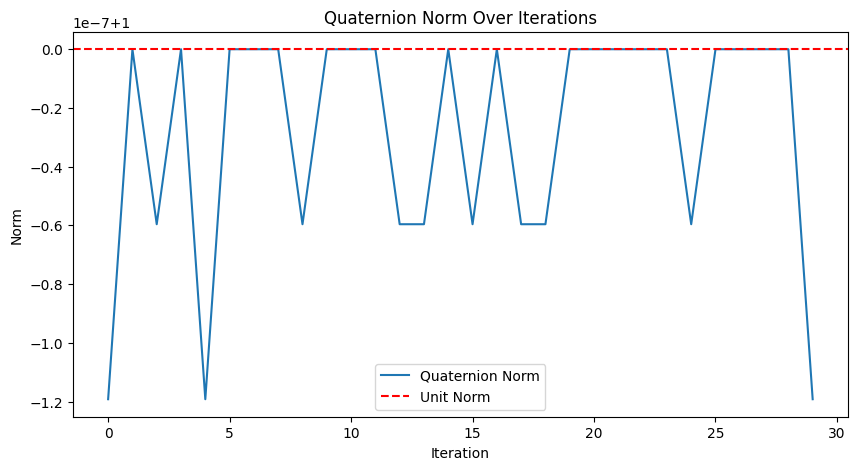

In [8]:
plot_quaternions(R_gt, parameter_updates)

## Teapot (Another Initialisation)

In [9]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
obj_name = obj_name + "_1"
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot_1


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


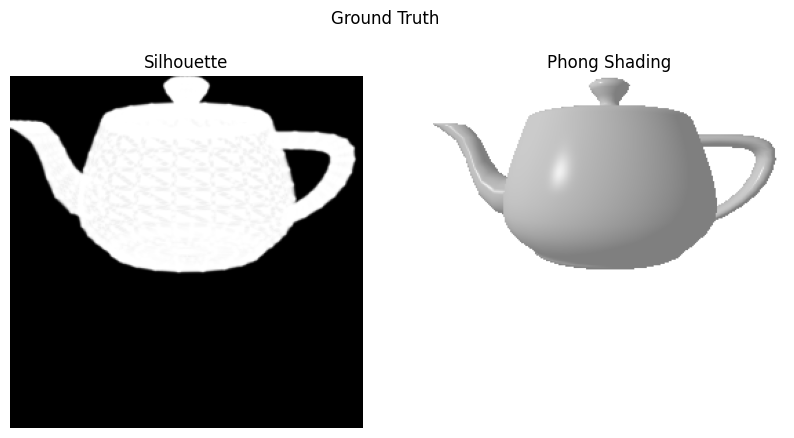

In [10]:
# Ground truth parameters

params = {
    "dist": -2,
    "elev": -15,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

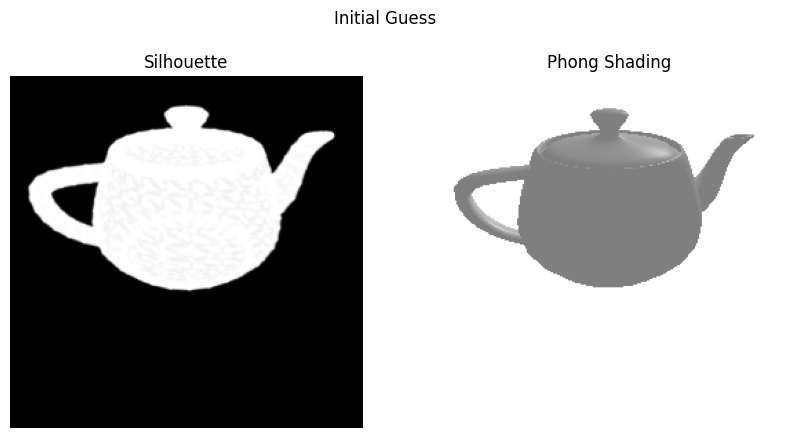

In [11]:
params = {
    "dist": 3,
    "elev": 15,
    "azim": 5
}

variances = {
    "dist": -2,
    "elev": 30,
    "azim": 30
}

# # Initial guess for R and T
# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0., device=device)

# # save R and T to a file
# np.save("data/teapot_R_init_2.npy", R_init.cpu().numpy())
# np.save("data/teapot_T_init_2.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/teapot_R_init_2.npy")).to(device)
T_init = torch.tensor(np.load("data/teapot_T_init_2.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

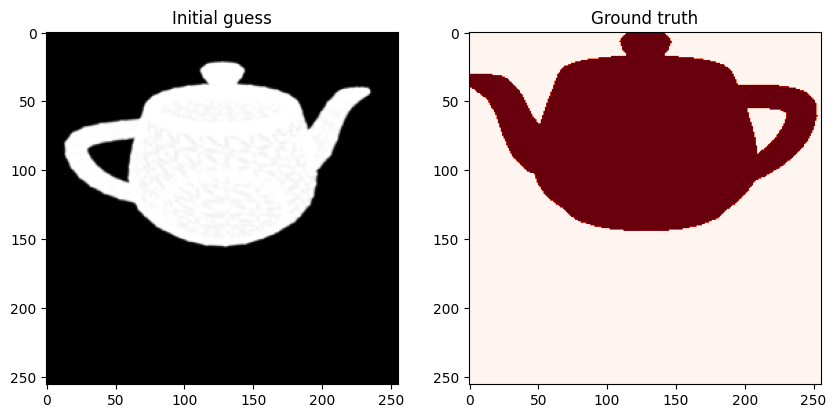

  0%|          | 0/25 [00:12<?, ?it/s]

iteration: 0, loss: 8822.373046875


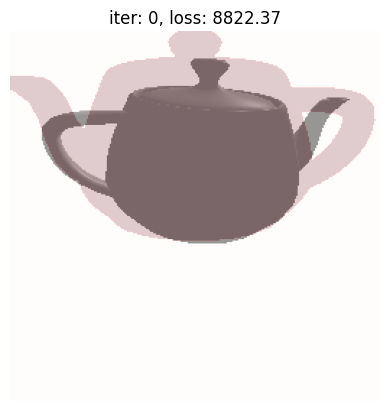

  8%|▊         | 2/25 [00:24<04:41, 12.22s/it]

iteration: 1, loss: 7291.09130859375


 12%|█▏        | 3/25 [00:36<04:26, 12.11s/it]

iteration: 2, loss: 7196.35986328125


 16%|█▌        | 4/25 [00:49<04:24, 12.58s/it]

iteration: 3, loss: 6682.56787109375


 20%|██        | 5/25 [01:02<04:12, 12.65s/it]

iteration: 4, loss: 6401.96435546875


 20%|██        | 5/25 [01:15<04:12, 12.65s/it]

iteration: 5, loss: 6014.67724609375


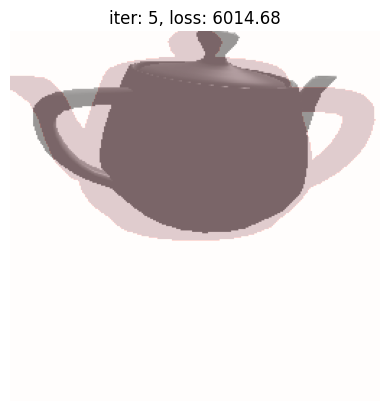

 28%|██▊       | 7/25 [01:28<03:52, 12.93s/it]

iteration: 6, loss: 5681.33740234375


 32%|███▏      | 8/25 [01:42<03:41, 13.04s/it]

iteration: 7, loss: 5609.35546875


 36%|███▌      | 9/25 [01:55<03:29, 13.09s/it]

iteration: 8, loss: 5769.115234375


 40%|████      | 10/25 [02:09<03:18, 13.24s/it]

iteration: 9, loss: 5772.357421875


 40%|████      | 10/25 [02:22<03:18, 13.24s/it]

iteration: 10, loss: 5803.71435546875


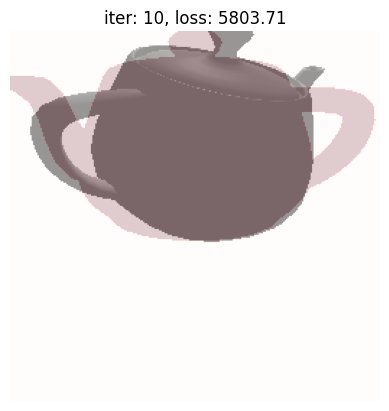

 48%|████▊     | 12/25 [02:36<02:55, 13.48s/it]

iteration: 11, loss: 5687.15478515625


 52%|█████▏    | 13/25 [02:50<02:42, 13.58s/it]

iteration: 12, loss: 5335.71826171875


 56%|█████▌    | 14/25 [03:03<02:29, 13.58s/it]

iteration: 13, loss: 5053.88671875


 60%|██████    | 15/25 [03:16<02:14, 13.45s/it]

iteration: 14, loss: 5038.77294921875


 60%|██████    | 15/25 [03:30<02:14, 13.45s/it]

iteration: 15, loss: 4950.68603515625


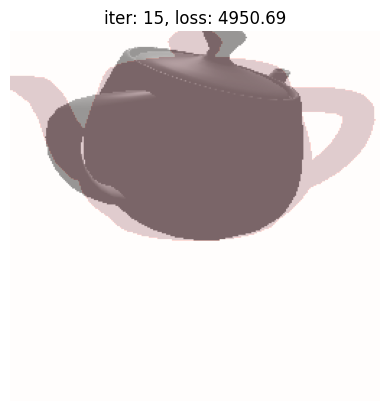

 68%|██████▊   | 17/25 [03:44<01:48, 13.54s/it]

iteration: 16, loss: 4735.14990234375


 72%|███████▏  | 18/25 [03:57<01:34, 13.51s/it]

iteration: 17, loss: 4803.9794921875


 76%|███████▌  | 19/25 [04:11<01:21, 13.54s/it]

iteration: 18, loss: 4744.7412109375


 80%|████████  | 20/25 [04:24<01:07, 13.54s/it]

iteration: 19, loss: 4869.86328125


 80%|████████  | 20/25 [04:38<01:07, 13.54s/it]

iteration: 20, loss: 4505.91162109375


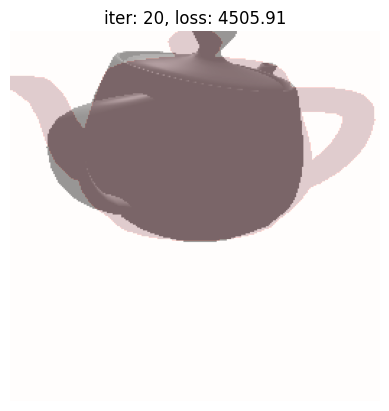

 88%|████████▊ | 22/25 [04:54<00:42, 14.16s/it]

iteration: 21, loss: 4540.69140625


 92%|█████████▏| 23/25 [05:09<00:29, 14.58s/it]

iteration: 22, loss: 4485.5224609375


 96%|█████████▌| 24/25 [05:25<00:14, 14.89s/it]

iteration: 23, loss: 4284.44189453125


100%|██████████| 25/25 [05:40<00:00, 13.63s/it]

iteration: 24, loss: 4101.6474609375


In [12]:
losses, parameter_updates, R_min, T_min = train_quaternion_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 25, device)

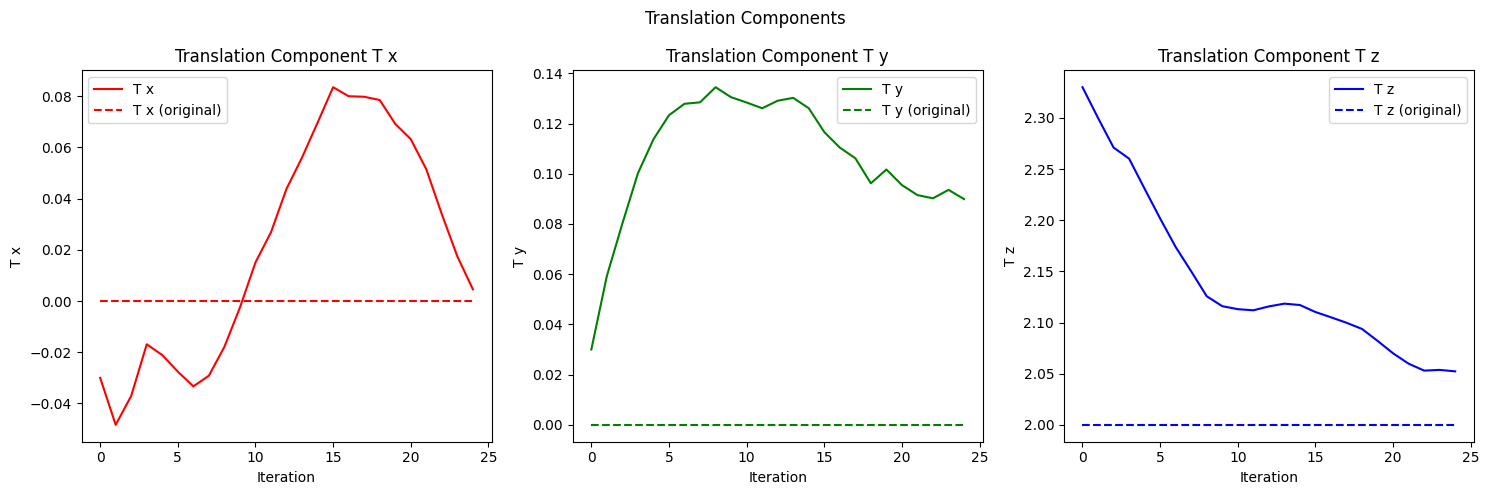

In [15]:
plot_translations(T_gt, parameter_updates)

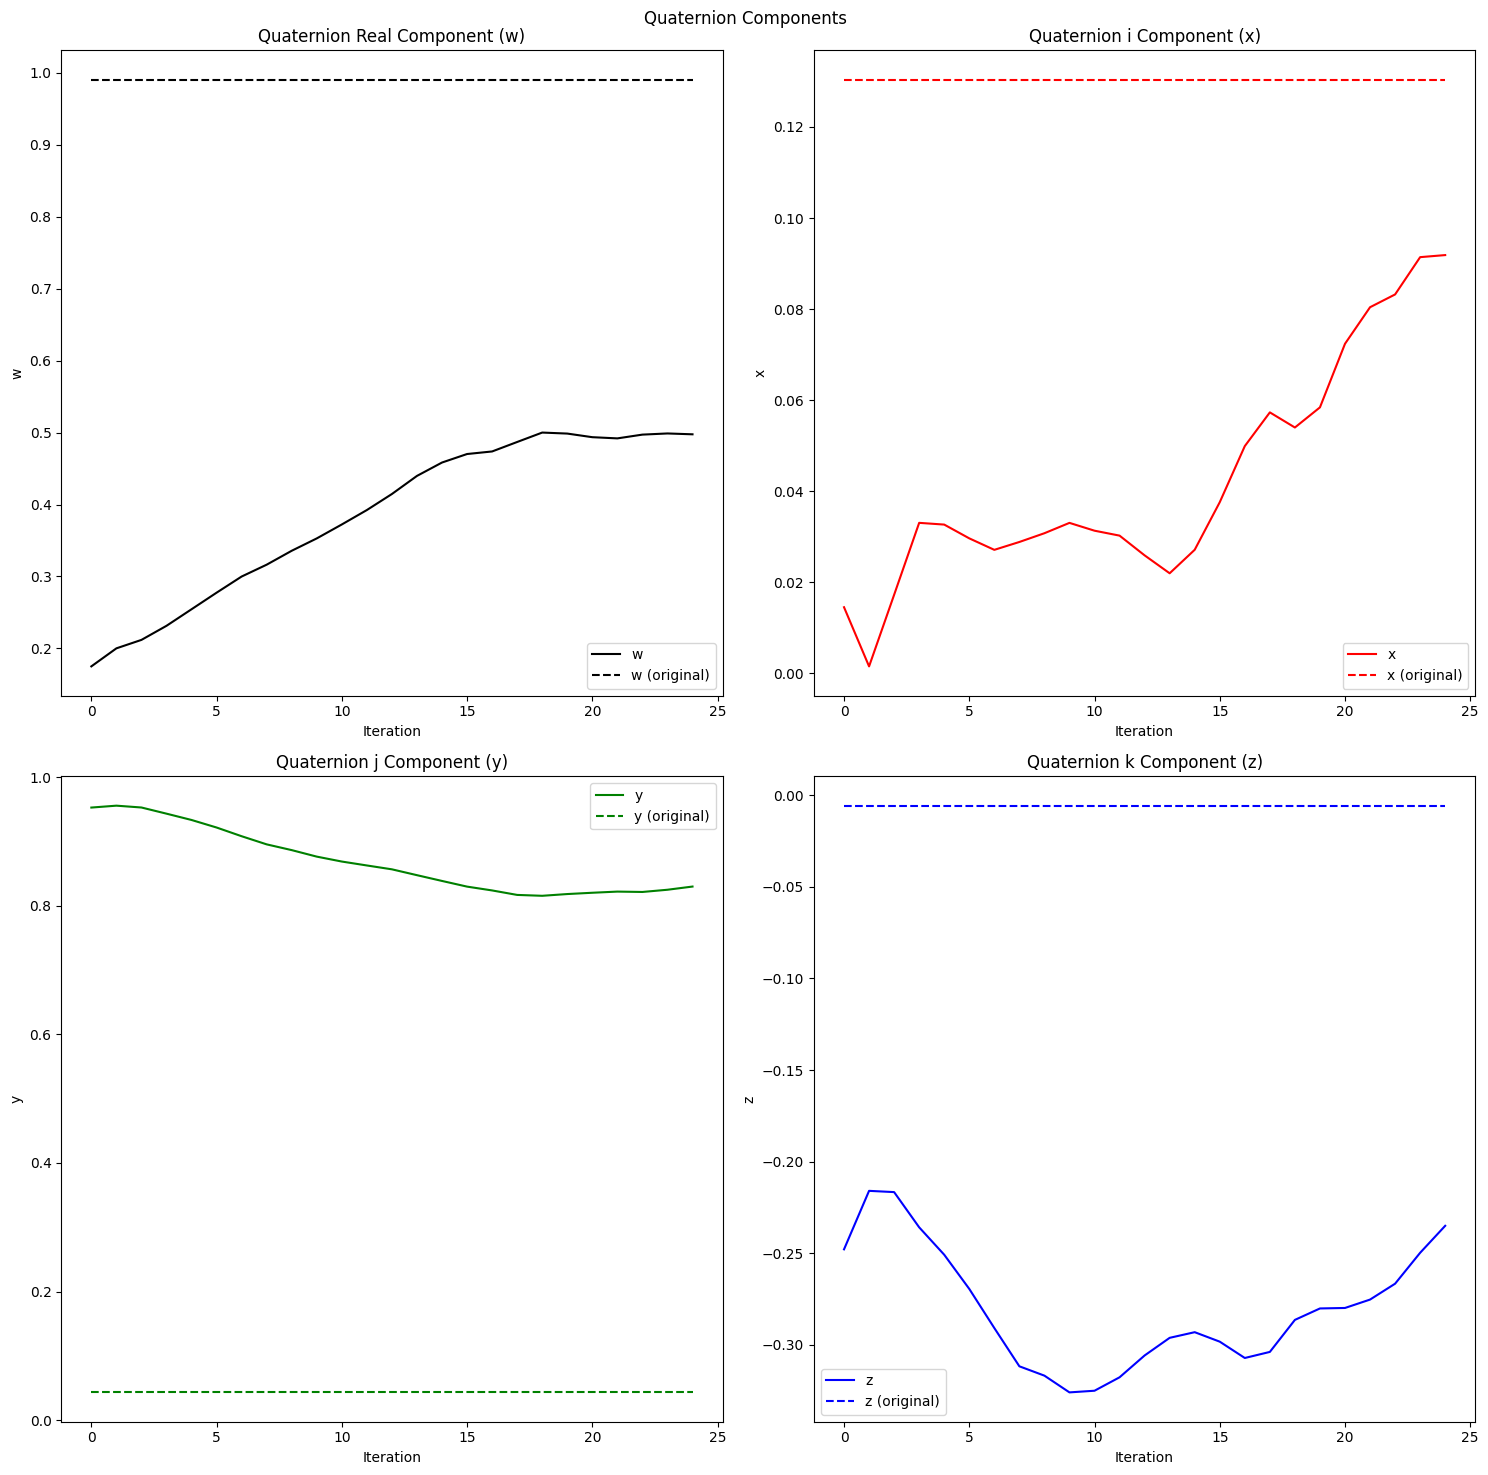

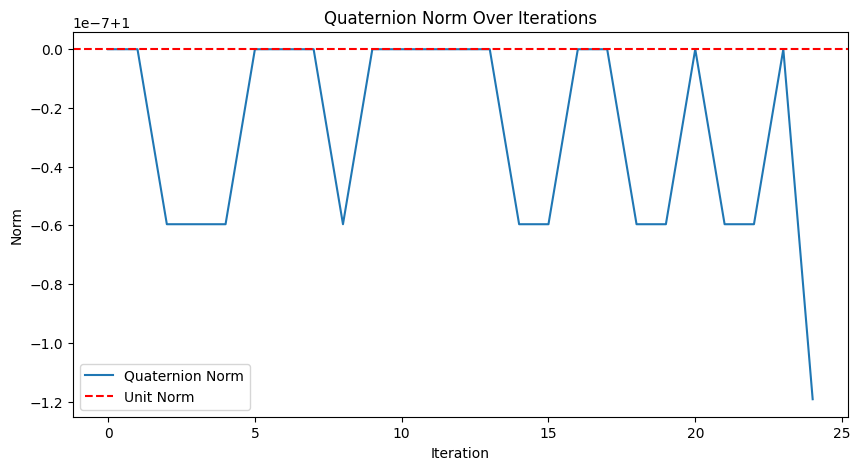

In [16]:
plot_quaternions(R_gt, parameter_updates)

# 2. Bunny

In [24]:
bunny_path = "data/bunny.obj"
obj_name = bunny_path.split(".")[-2].split("/")[-1]
obj_name = obj_name
print("Loading", obj_name)
bunny_mesh = load_mesh(bunny_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading bunny


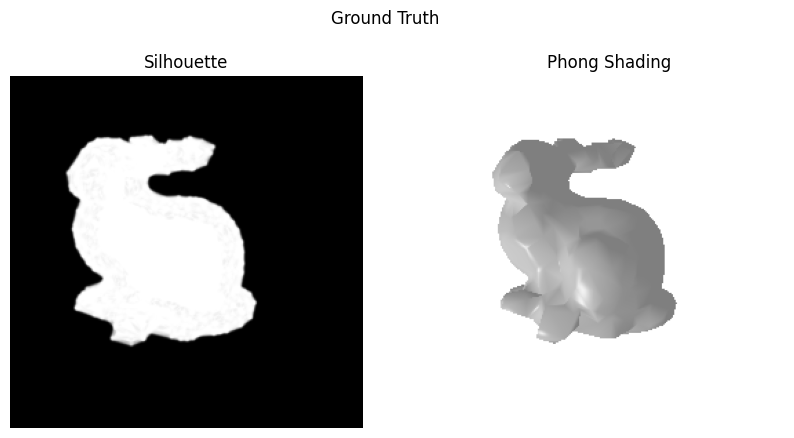

In [25]:
# Ground truth parameters

params = {
    "dist": -1.5,
    "elev": 270,
    "azim": 15
}

silhoutte_gt_bunny, phong_gt_bunny, R_gt, T_gt = get_ground_truth(bunny_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_bunny, phong_gt_bunny)

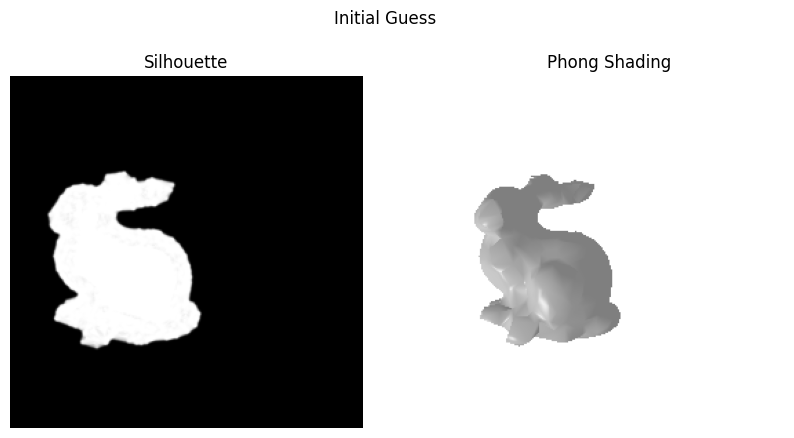

In [26]:
variances = {
    "dist": 0,
    "elev": 5,
    "azim": 5
}

# # Initial guess for R and T
# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)

# # save R and T to a file
# np.save("data/bunny_R_init.npy", R_init.cpu().numpy())
# np.save("data/bunny_T_init.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/bunny_R_init.npy")).to(device)
T_init = torch.tensor(np.load("data/bunny_T_init.npy")).to(device)

plot_initial_guess(bunny_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

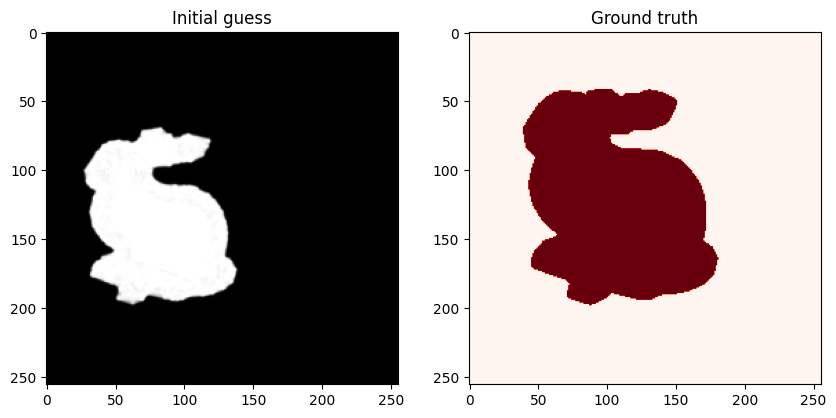

  0%|          | 0/30 [00:09<?, ?it/s]

iteration: 0, loss: 10001.15234375


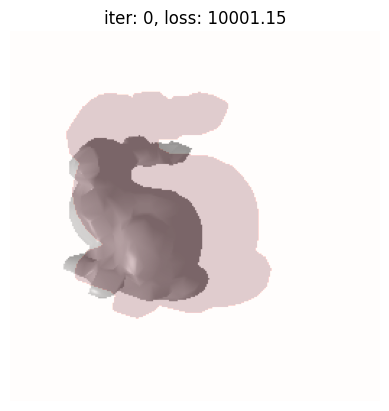

  7%|▋         | 2/30 [00:19<04:29,  9.62s/it]

iteration: 1, loss: 8751.328125


 10%|█         | 3/30 [00:28<04:15,  9.45s/it]

iteration: 2, loss: 8387.87109375


 13%|█▎        | 4/30 [00:38<04:06,  9.47s/it]

iteration: 3, loss: 8375.0302734375


 17%|█▋        | 5/30 [00:47<03:55,  9.41s/it]

iteration: 4, loss: 8158.34716796875


 17%|█▋        | 5/30 [00:56<03:55,  9.41s/it]

iteration: 5, loss: 7734.638671875


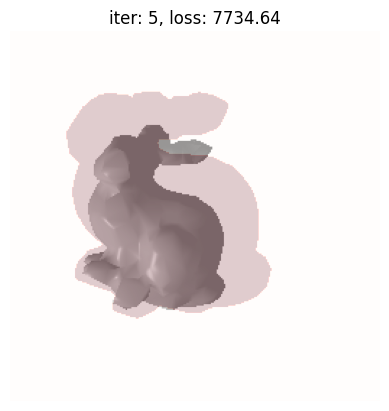

 23%|██▎       | 7/30 [01:06<03:37,  9.47s/it]

iteration: 6, loss: 7282.2890625


 27%|██▋       | 8/30 [01:15<03:28,  9.48s/it]

iteration: 7, loss: 7301.2734375


 30%|███       | 9/30 [01:25<03:19,  9.49s/it]

iteration: 8, loss: 7364.0888671875


 33%|███▎      | 10/30 [01:35<03:09,  9.49s/it]

iteration: 9, loss: 7125.302734375


 33%|███▎      | 10/30 [01:44<03:09,  9.49s/it]

iteration: 10, loss: 6733.9931640625


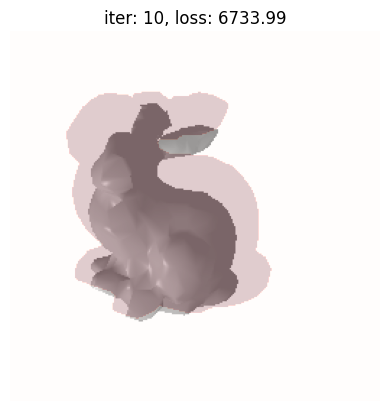

 40%|████      | 12/30 [01:54<02:54,  9.68s/it]

iteration: 11, loss: 6191.2998046875


 43%|████▎     | 13/30 [02:04<02:46,  9.77s/it]

iteration: 12, loss: 5481.99755859375


 47%|████▋     | 14/30 [02:14<02:37,  9.82s/it]

iteration: 13, loss: 4746.24560546875


 50%|█████     | 15/30 [02:24<02:29,  9.96s/it]

iteration: 14, loss: 4092.510498046875


 50%|█████     | 15/30 [02:35<02:29,  9.96s/it]

iteration: 15, loss: 3597.9208984375


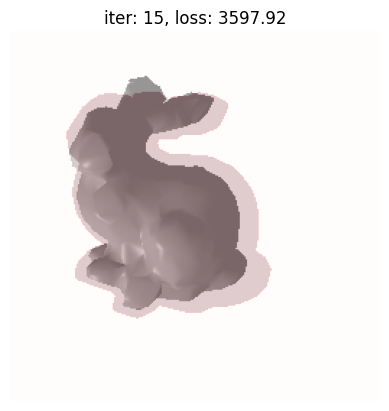

 57%|█████▋    | 17/30 [02:45<02:12, 10.20s/it]

iteration: 16, loss: 3411.1962890625


 60%|██████    | 18/30 [02:56<02:04, 10.34s/it]

iteration: 17, loss: 3317.29541015625


 63%|██████▎   | 19/30 [03:07<01:54, 10.44s/it]

iteration: 18, loss: 3378.1611328125


 67%|██████▋   | 20/30 [03:18<01:45, 10.58s/it]

iteration: 19, loss: 3026.1357421875


 67%|██████▋   | 20/30 [03:29<01:45, 10.58s/it]

iteration: 20, loss: 2147.0126953125


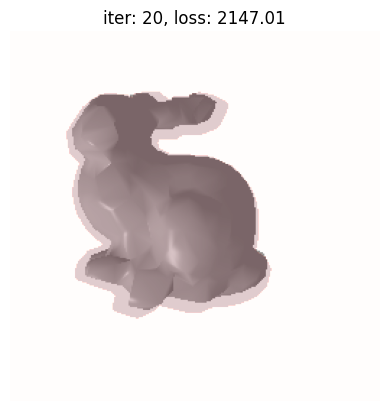

 73%|███████▎  | 22/30 [03:40<01:27, 10.93s/it]

iteration: 21, loss: 1579.30029296875


 77%|███████▋  | 23/30 [03:51<01:17, 11.06s/it]

iteration: 22, loss: 1647.214599609375


 80%|████████  | 24/30 [04:03<01:06, 11.11s/it]

iteration: 23, loss: 1738.75634765625


 83%|████████▎ | 25/30 [04:14<00:56, 11.20s/it]

iteration: 24, loss: 1482.355224609375


 83%|████████▎ | 25/30 [04:26<00:56, 11.20s/it]

iteration: 25, loss: 1236.537841796875


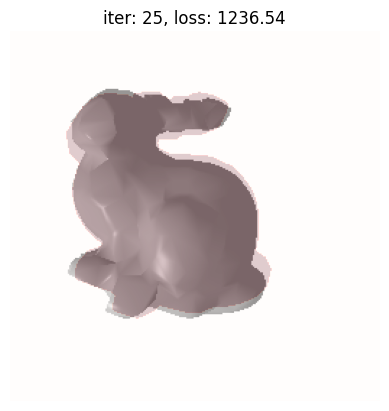

 90%|█████████ | 27/30 [04:37<00:34, 11.43s/it]

iteration: 26, loss: 1376.507568359375


 93%|█████████▎| 28/30 [04:49<00:23, 11.53s/it]

iteration: 27, loss: 1674.798583984375


 97%|█████████▋| 29/30 [05:01<00:11, 11.60s/it]

iteration: 28, loss: 1689.3055419921875


100%|██████████| 30/30 [05:13<00:00, 10.44s/it]

iteration: 29, loss: 1420.4505615234375


In [27]:
losses, parameter_updates, R_min, T_min = train_quaternion_model(bunny_mesh, silhoutte_gt_bunny, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 30, device)

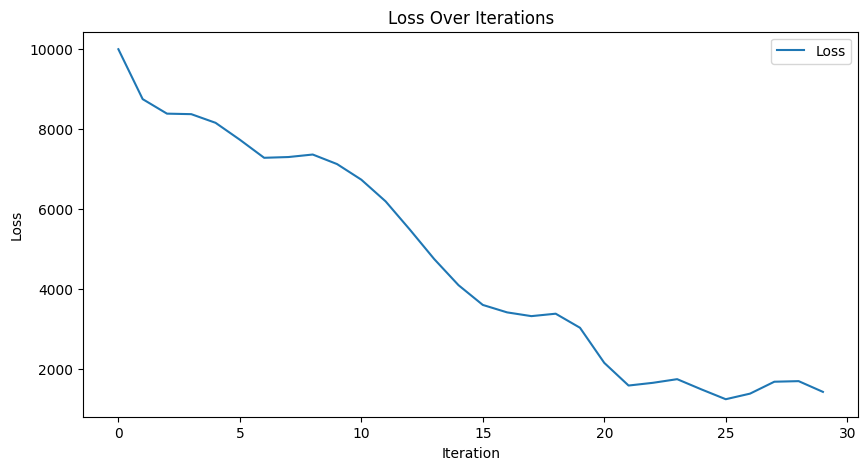

In [28]:
plot_losses(losses)

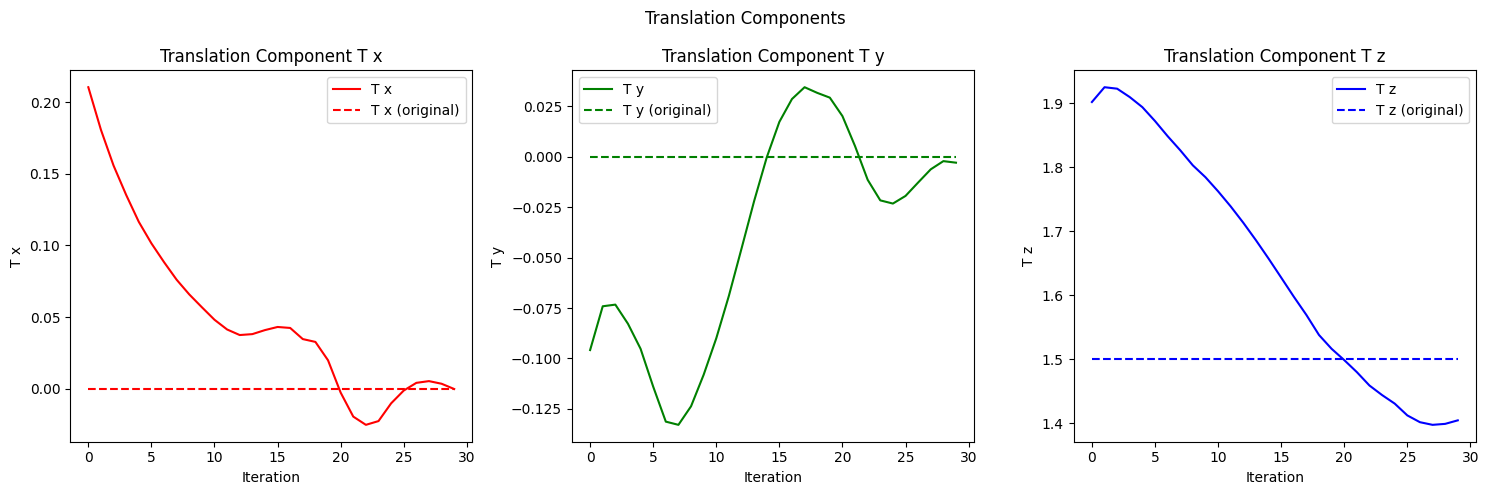

In [29]:
plot_translations(T_gt, parameter_updates)

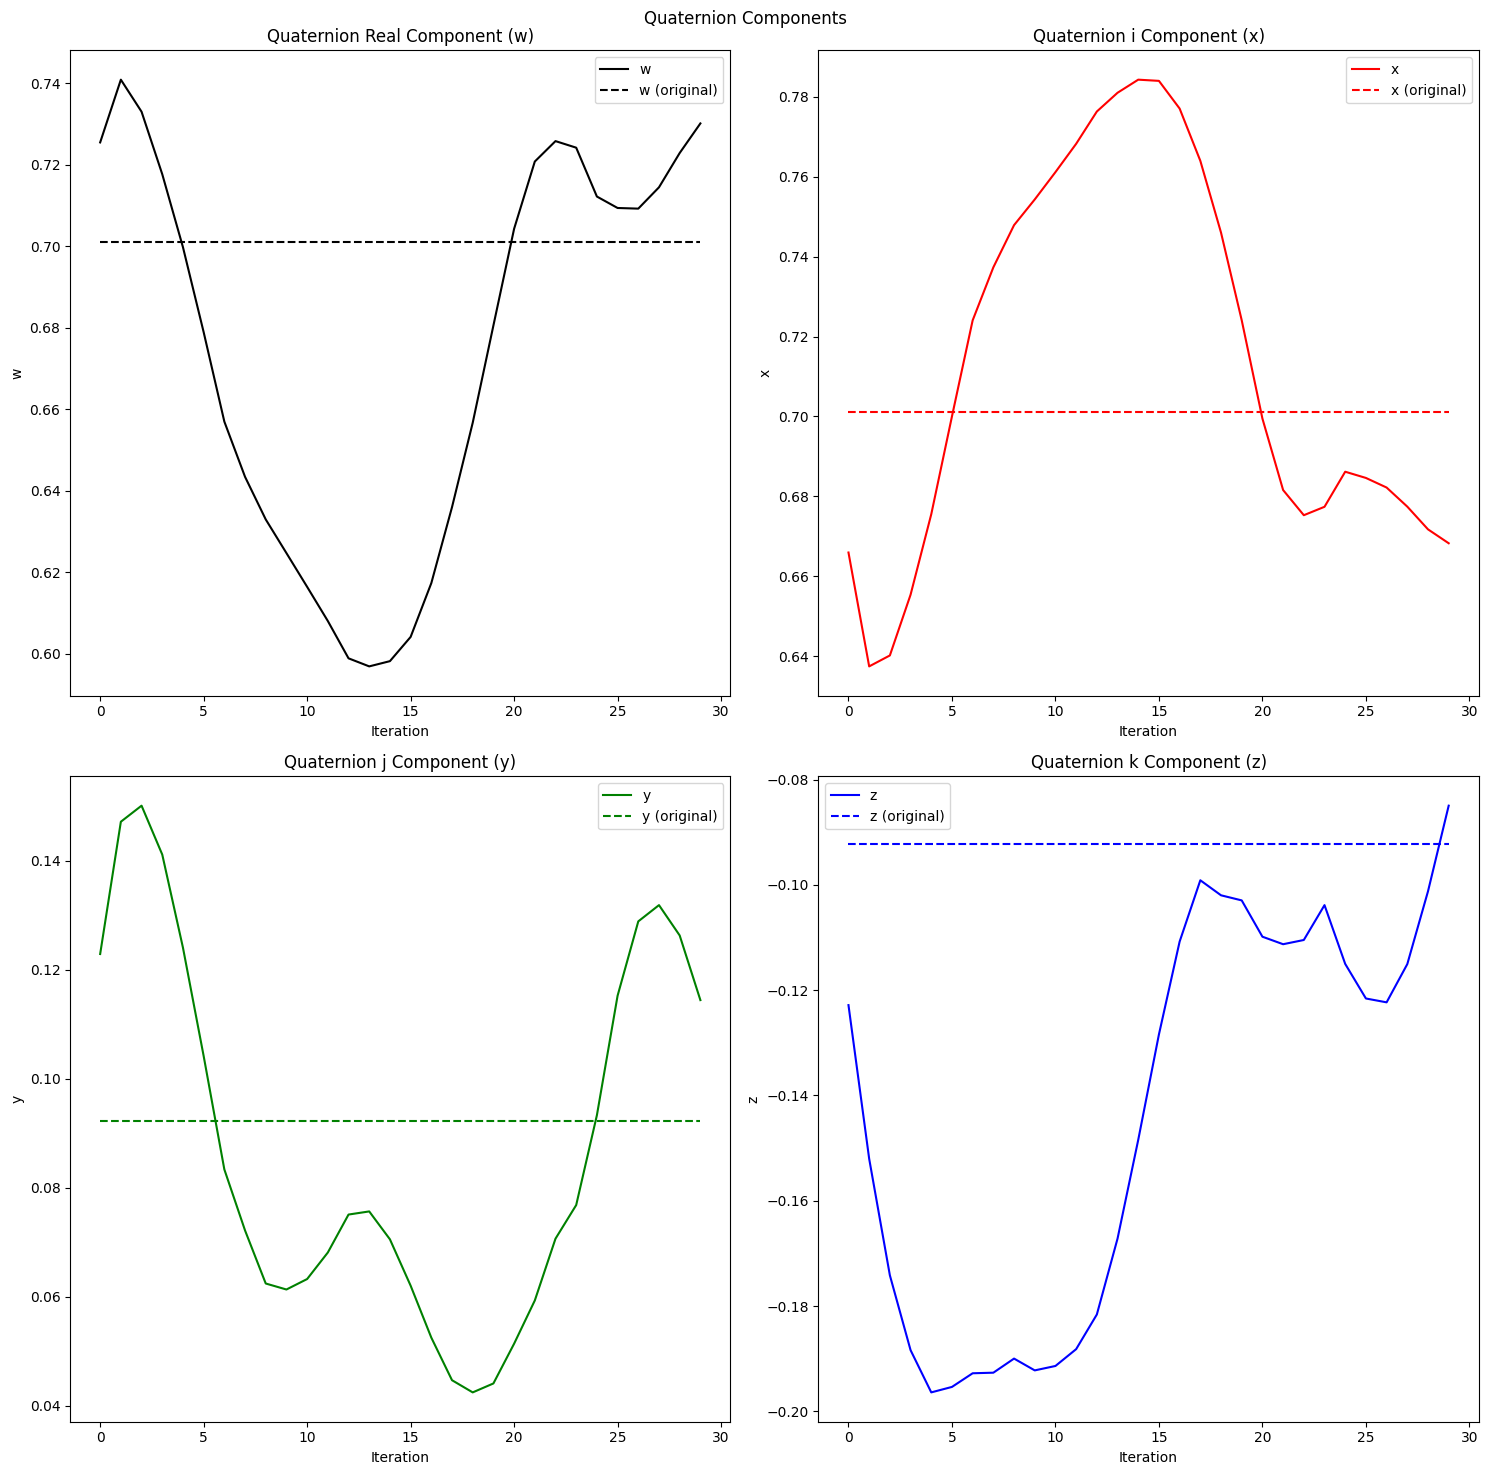

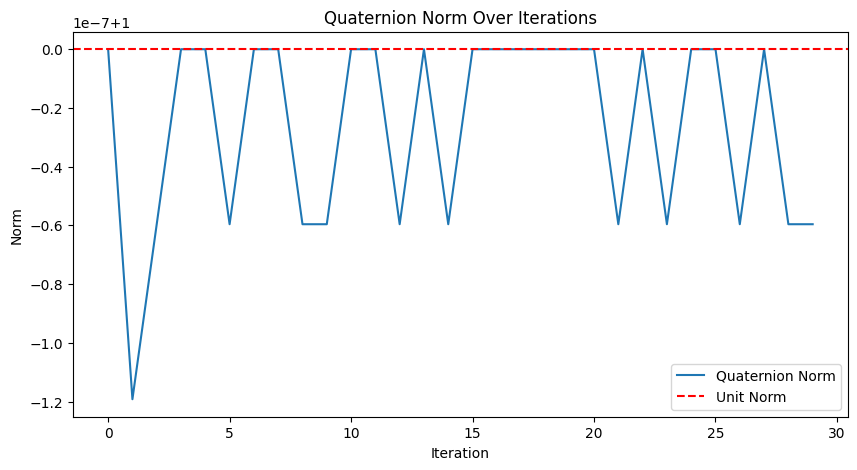

In [30]:
plot_quaternions(R_gt, parameter_updates)